# Kelompok 5

## Member:
1. Feri Andika - 32200007 :: Helps with Data Preprocessing
2. Lorne Jovan Rustiadi - 32200034 :: Helps with the computational and determining the algorithm we'll be using
3. Janice Claresta Lingga - 32200041 :: Helps with our report and beautify the markdown
4. Andrew Virya Victorio - 32200091 :: Builts the neural network architecture and the model, also training the model

## Table of Contents:

- [1 - Packages](#1)
- [2 - Load the Dataset](#2)
    - [Get the Head](#get-head)
- [3 - Data Exploration](#3)
    - [Explanation](#explanation-1)
    - [Russia Losses Equipment Section](#loss-eq)
        - [Calculating using statistical method](#calc)
        - [Changing NaN value in 'military_auto' column with Median value](#mil-med)
        - [Changing NaN value in 'fuel_tank' column with Mean value](#fuel-mean)
        - [Changing NaN value in 'special equipment' column with Mean value](#sp-eq)
        - [Changing NaN value in 'mobile SRBM system' column with Mode value](#mobile-srbm)
        - [Changing NaN value in 'vehicles and fuel tanks' column with Median value](#vehicles)
    - [Russia Losses Personnel Section](#loss-personnel)
        - [Dropping personnel* Column](#drop-personnel_asterisk)
    - [Merge Both Datasets](#merge)
- [4 - Data Visualization](#4)
    - [Personnel Losses](#vis-personnel_loss)
    - [POW](#vis-pow)
    - [Equipment Losses](#vis-eq)
    - [Air Equipment](#vis-air)
    - [Artillery, AA and Support/Logistic Vehicle Losses (Land)](#vis-land)
    - [Naval (Sea)](#vis-sea)
    - [Visual Comparison Between Land, Air, and Naval Losses](#vis-brief)
- [5 - Data Normalization](#5)

<a name='1'></a>
# 1 - Packages

- [pandas](https://pandas.pydata.org/) is used to read and manipulate our dataset to perform data analysis job
- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python
- [statistics](https://docs.python.org/3/library/statistics.html) is the library use for statistical computing
- [matplotlib](https://matplotlib.org/) is used for many tools like visualizing data, dates, and many more
- [seaborn](https://seaborn.pydata.org/) is used for statistical data visualization
- [scikit learn](https://scikit-learn.org/stable/index.html) specifically used for normalize the data before feeding it to our model

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as stat
import squarify
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from matplotlib import cbook as cbook
from matplotlib import ticker as ticker
from scipy.stats import pearsonr
from sklearn import preprocessing

<a name='2'></a>
# 2 - Load the Dataset

In [2]:
df_equipment = pd.read_csv('russia_losses_equipment.csv')
df_personnel = pd.read_csv('russia_losses_personnel.csv')

<a name='get-head'></a>
### Get the Head

In [3]:
df_equipment.head(10)

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN
5,2022-03-02,7,30,31,211,862,85,40,355.0,60.0,3,2,9,NaN,NaN,NaN,NaN
6,2022-03-03,8,30,31,217,900,90,42,374.0,60.0,3,2,11,NaN,NaN,NaN,NaN
7,2022-03-04,9,33,37,251,939,105,50,404.0,60.0,3,2,18,NaN,NaN,NaN,NaN
8,2022-03-05,10,39,40,269,945,105,50,409.0,60.0,3,2,19,NaN,NaN,NaN,NaN
9,2022-03-06,11,44,48,285,985,109,50,447.0,60.0,4,2,21,NaN,NaN,NaN,NaN


In [4]:
df_personnel.head(10)

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0
1,2022-02-26,3,4300,about,0
2,2022-02-27,4,4500,about,0
3,2022-02-28,5,5300,about,0
4,2022-03-01,6,5710,about,200
5,2022-03-02,7,5840,about,200
6,2022-03-03,8,9000,about,200
7,2022-03-04,9,9166,about,200
8,2022-03-05,10,10000,about,216
9,2022-03-06,11,11000,about,232


<a name='3'></a>
# 3 - Data Exploration

In [5]:
df_equipment.info()
print('\n\n')
df_personnel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     91 non-null     object 
 1   day                      91 non-null     int64  
 2   aircraft                 91 non-null     int64  
 3   helicopter               91 non-null     int64  
 4   tank                     91 non-null     int64  
 5   APC                      91 non-null     int64  
 6   field artillery          91 non-null     int64  
 7   MRL                      91 non-null     int64  
 8   military auto            65 non-null     float64
 9   fuel tank                65 non-null     float64
 10  drone                    91 non-null     int64  
 11  naval ship               91 non-null     int64  
 12  anti-aircraft warfare    91 non-null     int64  
 13  special equipment        72 non-null     float64
 14  mobile SRBM system       36 

<a name='explanation-1'></a>
### Explanation

> In russia_losses_equipment, there's a missing value we need to treat so the dataset will be usable to feed into our model. We also want to change the `date` type to `datetime` for time series analysis.

```
Time series analysis is a way of analyzing a sequence of data points collected of an interval of time.
```

1. Change the `date` type to datetime using `pandas` module
2. Finding the value with Median/Mean/Mode a.k.a Statistical method for each column in each datasets
3. Replacing the missing value with the calculated value for each column
3. In personnel dataset, we will drop `personnel*` column since it doesn't bring any value to the data
4. Merging both datasets into one

In [6]:
# 1. Changing 'date' type to datetime
df_equipment['date'] = pd.to_datetime(df_equipment['date'])
df_personnel['date'] = pd.to_datetime(df_personnel['date'])

<a name='calc'></a>
## Calculating using statistical method

<a name='loss-eq'></a>
### Russia Losses Equipment Section

<a name='mil-med'></a>
## Changing NaN value in 'military_auto' column with Median value

In [7]:
df_equipment.loc[df_equipment['military auto'].notnull(), 'military auto']

0      100.0
1      130.0
2      130.0
3      291.0
4      305.0
       ...  
60    1643.0
61    1666.0
62    1688.0
63    1695.0
64    1701.0
Name: military auto, Length: 65, dtype: float64

In [8]:
military_med = df_equipment['military auto'].median()
military_med

1178.0

In [9]:
df_equipment['military auto'].fillna(value=military_med, inplace=True)

<a name='fuel-mean'></a>
## Changing NaN value in 'fuel_tank' column with Mean value

In [10]:
df_equipment.loc[df_equipment['fuel tank'].notnull(), 'fuel tank']

0     60.0
1     60.0
2     60.0
3     60.0
4     60.0
      ... 
60    76.0
61    76.0
62    76.0
63    76.0
64    76.0
Name: fuel tank, Length: 65, dtype: float64

In [11]:
fuel_mean = df_equipment['fuel tank'].mean()
fuel_mean

69.32307692307693

In [12]:
df_equipment['fuel tank'].fillna(value=fuel_mean, inplace=True)

<a name='sp-eq'></a>
## Changing NaN value in 'special equipment' column with Mean value

In [13]:
df_equipment.loc[df_equipment['special equipment'].notnull(), 'special equipment']

19    10.0
20    10.0
21    11.0
22    11.0
23    12.0
      ... 
86    43.0
87    43.0
88    43.0
89    44.0
90    47.0
Name: special equipment, Length: 72, dtype: float64

In [14]:
special_mean = df_equipment['special equipment'].mean()
special_mean

29.444444444444443

In [15]:
df_equipment['special equipment'].fillna(value=special_mean, inplace=True)

<a name='mobile-srbm'></a>
## Changing NaN value in 'mobile SRBM system' column with Mode value

In [16]:
df_equipment.loc[df_equipment['mobile SRBM system'].notnull(), 'mobile SRBM system']

29    2.0
30    4.0
31    4.0
32    4.0
33    4.0
34    4.0
35    4.0
36    4.0
37    4.0
38    4.0
39    4.0
40    4.0
41    4.0
42    4.0
43    4.0
44    4.0
45    4.0
46    4.0
47    4.0
48    4.0
49    4.0
50    4.0
51    4.0
52    4.0
53    4.0
54    4.0
55    4.0
56    4.0
57    4.0
58    4.0
59    4.0
60    4.0
61    4.0
62    4.0
63    4.0
64    4.0
Name: mobile SRBM system, dtype: float64

In [17]:
df_equipment.loc[df_equipment['mobile SRBM system'] == 4, 'mobile SRBM system'].count()

35

In [18]:
df_equipment.loc[df_equipment['mobile SRBM system'] == 2, 'mobile SRBM system'].count()

1

In [19]:
mobile_mode = stat.mode(df_equipment["mobile SRBM system"])
mobile_mode

4.0

In [20]:
df_equipment["mobile SRBM system"].fillna(value=mobile_mode, inplace=True)

<a name='vehicles'></a>
## Changing NaN value in 'vehicles and fuel tanks' column with Median value

In [21]:
df_equipment.loc[df_equipment['vehicles and fuel tanks'].notnull(), 'vehicles and fuel tanks']

65    1796.0
66    1824.0
67    1843.0
68    1867.0
69    1907.0
70    1926.0
71    1934.0
72    1961.0
73    1970.0
74    1980.0
75    1997.0
76    2019.0
77    2042.0
78    2059.0
79    2087.0
80    2101.0
81    2109.0
82    2137.0
83    2157.0
84    2162.0
85    2178.0
86    2194.0
87    2206.0
88    2213.0
89    2217.0
90    2225.0
Name: vehicles and fuel tanks, dtype: float64

In [22]:
vehicle_med = df_equipment['vehicles and fuel tanks'].median()
vehicle_med 

2050.5

In [23]:
df_equipment['vehicles and fuel tanks'].fillna(value=vehicle_med, inplace=True)

<a name='cruise-missiles'></a>
## Changing NaN value in 'cruise missiles' column with Mean value

In [24]:
df_equipment.loc[df_equipment['cruise missiles'].notnull(), 'cruise missiles']

65     84.0
66     84.0
67     84.0
68     87.0
69     89.0
70     90.0
71     90.0
72     92.0
73     94.0
74     94.0
75     94.0
76     94.0
77     95.0
78     95.0
79     95.0
80     97.0
81     97.0
82    102.0
83    103.0
84    103.0
85    104.0
86    107.0
87    110.0
88    112.0
89    112.0
90    114.0
Name: cruise missiles, dtype: float64

In [25]:
cruise_mean = df_equipment['cruise missiles'].mean()
cruise_mean

97.0

In [26]:
df_equipment['cruise missiles'].fillna(value=cruise_mean, inplace=True)

<a name='loss-personnel'></a>
### Russia Losses Personnel Section

<a name='drop-personnel_asterisk'></a>
## Dropping personnel* Column

In [28]:
df_personnel.drop(labels=['personnel*', 'day'], axis=1, inplace=True)

<a name='merge'></a>
## Merge Both Datasets

In [29]:
df_losses = df_equipment.merge(df_personnel, how='inner', on='date')

In [49]:
# The personnel losses are cumulative, so we're adding a column with daily/incremental personnel losses
df_losses['inc_personnel_loss'] = df_losses['personnel'].diff(periods=1)

# The day 1 is missing, so we should set the day 1
df_losses['inc_personnel_loss'] = df_losses['inc_personnel_loss'].replace(df_losses['inc_personnel_loss'][0], df_losses['personnel'][0])

# Adding a weeks column
df_losses['week'] = df_losses['day']//7

df_losses

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,...,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles,personnel,POW,inc_personnel_loss,week
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.000000,...,2,0,29.444444,4.0,2050.5,97.0,2800,0,2800.0,0
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.000000,...,2,0,29.444444,4.0,2050.5,97.0,4300,0,1500.0,0
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.000000,...,2,0,29.444444,4.0,2050.5,97.0,4500,0,200.0,0
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.000000,...,2,5,29.444444,4.0,2050.5,97.0,5300,0,800.0,0
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.000000,...,2,7,29.444444,4.0,2050.5,97.0,5710,200,410.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2022-05-22,88,204,170,1285,3141,599,201,1178.0,69.323077,...,13,93,43.000000,4.0,2194.0,107.0,29050,498,200.0,12
87,2022-05-23,89,204,170,1293,3166,604,201,1178.0,69.323077,...,13,93,43.000000,4.0,2206.0,110.0,29200,498,150.0,12
88,2022-05-24,90,205,170,1302,3194,606,201,1178.0,69.323077,...,13,93,43.000000,4.0,2213.0,112.0,29350,498,150.0,12
89,2022-05-25,91,206,170,1305,3213,606,201,1178.0,69.323077,...,13,93,44.000000,4.0,2217.0,112.0,29450,498,100.0,13


<a name='4'></a>
# 4 - Data Visualization

<a name='vis-personnel_loss'></a>
## Personnel Losses

Text(0.5, 1.0, 'Cumulative Personnel Losses')

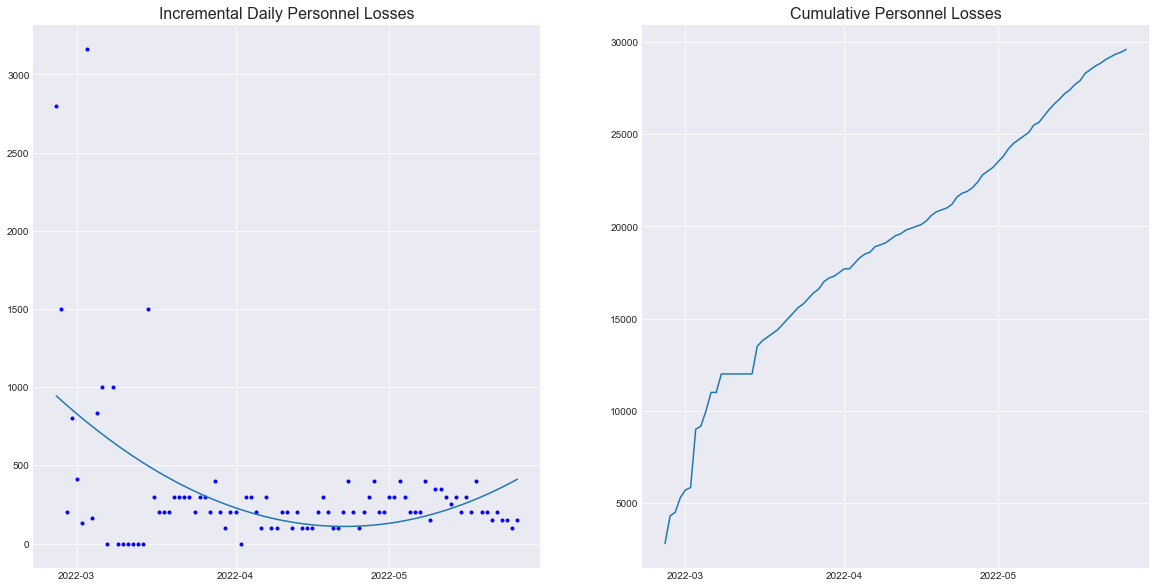

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].plot(df_losses['date'], df_losses['inc_personnel_loss'], 'b.')
axes[1].plot(df_losses['date'], df_losses['personnel'])

for ax in axes:
    ax.xaxis.set_minor_locator(mdates.DayLocator(bymonthday=[25], interval=1, tz=None))
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.grid(True)

# Add trendline to personnel losses
z = np.polyfit(mdates.date2num(df_losses['date']), df_losses['inc_personnel_loss'], 2)
p = np.poly1d(z)
axes[0].plot(mdates.date2num(df_losses['date']), p(mdates.date2num(df_losses['date'])))

axes[0].set_title('Incremental Daily Personnel Losses', fontsize=16)
axes[1].set_title('Cumulative Personnel Losses', fontsize=16)

Text(0.5, 1.0, 'From the third week, personnel column are lacking of updates, \n most personnel losses happened during the first days of the war.')

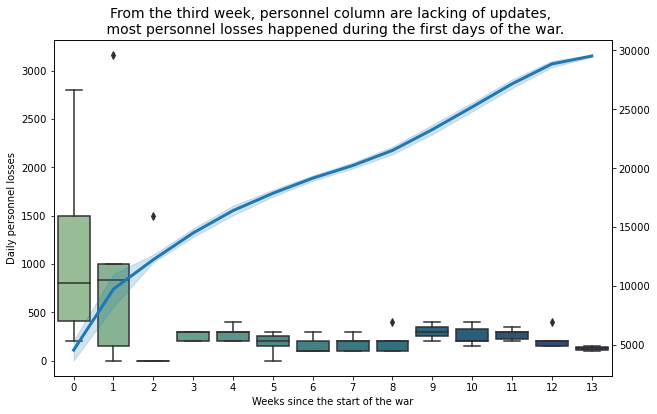

In [32]:
fig, ax_candle_1 = plt.subplots(figsize=(10, 10*0.618))

bp = sns.boxplot(data=df_losses, x='week', y='inc_personnel_loss', palette='crest', ax=ax_candle_1)
ax_candle_2 = ax_candle_1.twinx()

lp = sns.lineplot(data=df_losses, x='week', y='personnel', linewidth=3, ax=ax_candle_2)

ax_candle_1.set(xlabel='Weeks since the start of the war', ylabel='Daily personnel losses')
ax_candle_2.set(ylabel='')
ax_candle_1.set_title('From the third week, personnel column are lacking of updates, \n most personnel losses happened during the first days of the war.', fontsize=14)

<a name='vis-pow'></a>
## POW (Prisoners-of-War)

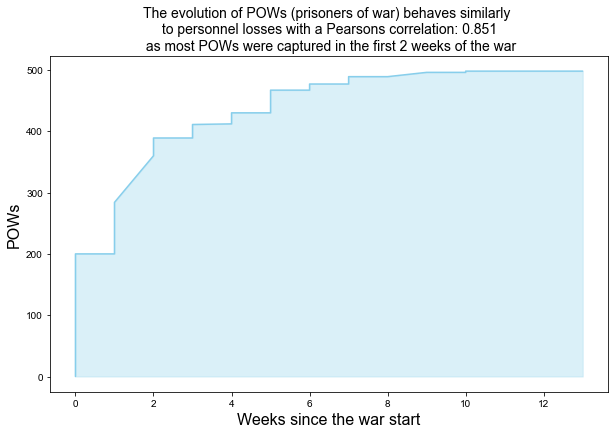

In [33]:
fig, ax_pow = plt.subplots(figsize=(10, 10*0.618))

plt.style.use('seaborn-darkgrid')

ax_pow.fill_between(df_losses['week'], df_losses['POW'], color='skyblue', alpha=.3)
ax_pow.plot(df_losses['week'], df_losses['POW'], color='skyblue')

# Getting correlation with personnel losses
corr, _ = pearsonr(df_losses['POW'], df_losses['personnel'])
Pearsons_corr = 'Pearsons correlation: %.3f' % corr

plt.title(f'The evolution of POWs (prisoners of war) behaves similarly \n to personnel losses with a {Pearsons_corr} \n as most POWs were captured in the first 2 weeks of the war', fontsize=14)
plt.xlabel('Weeks since the war start', fontsize=16)
plt.ylabel('POWs', fontsize=16)

plt.show()

<a name='vis-eq'></a>
## Equipment Losses

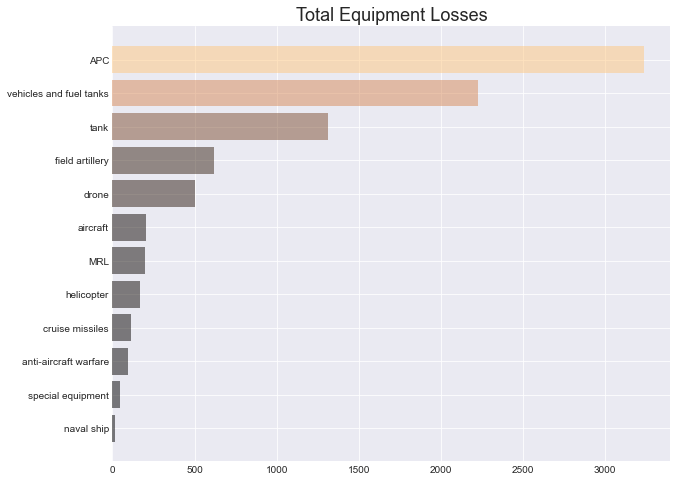

In [34]:
fig, ax_eq = plt.subplots(figsize=(10, 8))

df_bar = df_losses.loc[:, ~df_losses.columns.isin(['date', 'day', 'week', 'personnel', 'POW', 'inc_personnel_loss', 'military auto', 'fuel tank', 'mobile SRBM system'])].sort_values(by=len(df_losses.index)-1, axis=1)

x = df_bar.columns.values
y = df_bar.tail(1).squeeze().values

my_cmap = plt.get_cmap('copper')

rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

ax_eq.barh(x, y, align='center', alpha=.5, color=my_cmap(rescale(y)))
ax_eq.set_title('Total Equipment Losses', fontsize=18)

plt.show()

<a name='vis-air'></a>
## Air Equipment

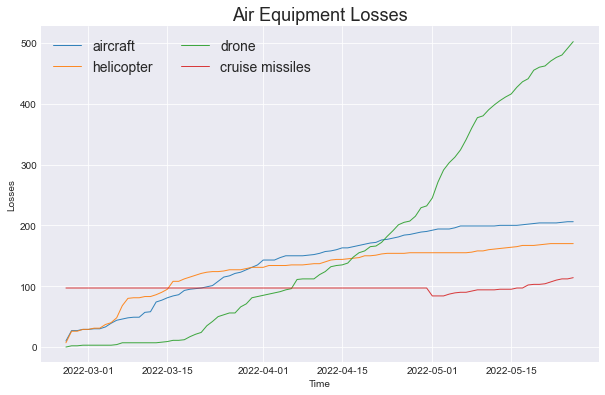

In [35]:
fig, ax_air = plt.subplots(figsize=(10, 10*0.618))

num = 0
for column in df_losses[['aircraft', 'helicopter', 'drone', 'cruise missiles']]:
    num += 1
    plt.plot(df_losses['date'], df_losses[column], marker='', linewidth=1, alpha=.9, label=column)
    
plt.legend(loc=2, ncol=2, fontsize=14)

plt.title('Air Equipment Losses', fontsize=18)
plt.xlabel('Time')
plt.ylabel('Losses')

plt.show()

<a name='vis-land'></a>
## Artillery, AA and Support/Logistic Vehicle Losses (Land)

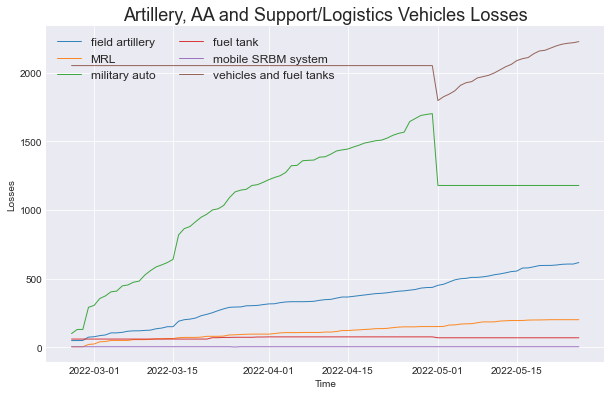

In [36]:
fig, ax_land = plt.subplots(figsize=(10, 10*0.618))

num = 0
for column in df_losses[['field artillery', 'MRL', 'military auto', 'fuel tank', 'mobile SRBM system', 'vehicles and fuel tanks']]:
    num += 1
    plt.plot(df_losses['date'], df_losses[column], marker='', linewidth=1, alpha=.9, label=column)

plt.legend(loc=2, ncol=2, fontsize=12)

plt.title('Artillery, AA and Support/Logistics Vehicles Losses', fontsize=18)
plt.xlabel('Time')
plt.ylabel('Losses')

plt.show()

<a name='vis-naval'></a>
## Naval (Sea)

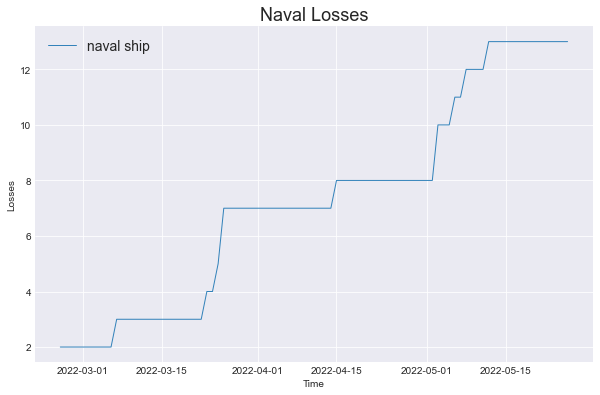

In [37]:
fig, ax_sea = plt.subplots(figsize=(10, 10*0.618))

num = 0
for column in df_losses[['naval ship']]:
    num += 1
    plt.plot(df_losses['date'], df_losses[column], marker='', linewidth=1, alpha=.9, label=column)
    
plt.legend(loc=2, ncol=2, fontsize=14)

plt.title('Naval Losses', fontsize=18)
plt.xlabel('Time')
plt.ylabel('Losses')

plt.show()

<a name='vis-brief'></a>
## Visual Comparison Between Land, Air, and Naval Losses

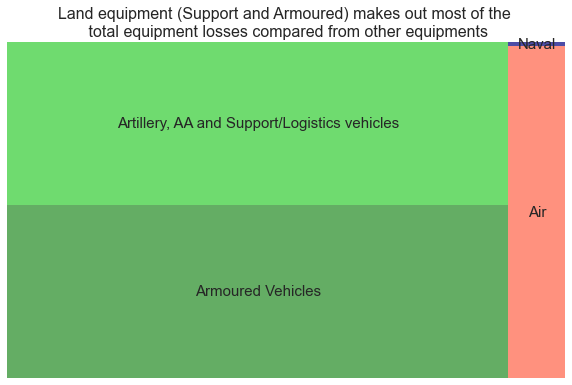

In [38]:
fig, ax_brief = plt.subplots(figsize=(10, 10*0.618))

air_losses = df_losses[['aircraft', 'helicopter', 'drone', 'cruise missiles']].sum(axis=1)
land_armoured_losses = df_losses[['tank', 'APC']].sum(axis=1)
land_support_losses = df_losses[['field artillery', 'MRL', 'military auto', 'fuel tank', 'mobile SRBM system', 'vehicles and fuel tanks']].sum(axis=1)
sea_losses = df_losses[['naval ship']].sum(axis=1)

Casualty_dict = {
    'Armoured Vehicles': land_armoured_losses.tail(1).values,
    'Artillery, AA and Support/Logistics vehicles': land_support_losses.tail(1).values,
    'Air': air_losses.tail(1).values,
    'Naval': sea_losses.tail(1).values
}
colors = ['forestGreen', 'limegreen', 'tomato', 'navy']

squarify.plot(sizes=list(Casualty_dict.values()), label=list(Casualty_dict.keys()), color=colors, alpha=.7, text_kwargs={'fontsize': 15})
plt.axis('off')
plt.title('Land equipment (Support and Armoured) makes out most of the \n total equipment losses compared from other equipments', fontsize=16)

plt.show()

<a name='corr-matrix'></a>
## Correlation Matrix

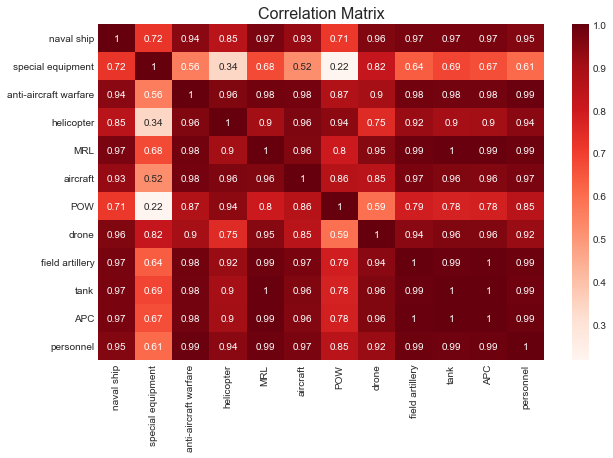

In [39]:
fig, ax_corrMatrix = plt.subplots(figsize=(10, 10*0.618))

df_corrMatrix = df_losses.loc[:, ~df_losses.columns.isin(['date', 'day', 'week', 'inc_personnel_loss', 'military auto', 'fuel tank', 'mobile SRBM system', 'cruise missiles', 'vehicles and fuel tanks'])].sort_values(by=len(df_losses.index)-1, axis=1)

corrMatrix = df_corrMatrix.corr()
sns.heatmap(corrMatrix, annot=True, cmap='Reds')

plt.title('Correlation Matrix', fontsize=16)

plt.show()

<a name='5'></a>
# 5 - Data Normalization

In [47]:
col_names = df_losses.columns.to_list()
norm = preprocessing.normalize(df_losses)
# norm_df_losses = pd.DataFrame(normal, columns=col_names)
# norm_df_losses.head()

TypeError: The DTypes <class 'numpy.dtype[int64]'> and <class 'numpy.dtype[datetime64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.